In [7]:
#pip install kagglehub

In [ ]:
import tensorflow as tf
import os
import kagglehub
# confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Download latest version
path = kagglehub.dataset_download("sudarshanvaidya/random-images-for-face-emotion-recognition")

print("Path to dataset files:", path)

Path to dataset files: /Users/macos/.cache/kagglehub/datasets/sudarshanvaidya/random-images-for-face-emotion-recognition/versions/1


In [3]:
# list files in path
import os
for root, dirs, files in os.walk(path):
    for dir in dirs:
        print(dir)

contempt
fear
surprise
sadness
neutrality
happiness
anger
disgust


In [13]:
def create_image_dataset(path, image_size=(224, 224), batch_size=32, subset="training"):
    """Create a TensorFlow dataset from image directory structure"""

    dataset = tf.keras.utils.image_dataset_from_directory(
        path,
        labels='inferred',  # infer labels from subdirectory names
        label_mode='categorical',  # or 'int' for integer labels
        class_names=["contempt", "fear", "surprise", "sadness", "neutrality", "happiness", "anger", "disgust"],
        color_mode='rgb',
        batch_size=batch_size,
        image_size=image_size,
        shuffle=True,
        seed=123,
        validation_split=0.2,  # optional: split for validation
        subset=subset  # "training" or "validation"
    )

    # Normalize pixel values to [0,1]
    normalization_layer = tf.keras.layers.Rescaling(1./255)
    dataset = dataset.map(lambda x, y: (normalization_layer(x), y))

    # Optimize performance
    dataset = dataset.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

    return dataset

# Usage
dataset = create_image_dataset(path, image_size=(224, 224), batch_size=32)

# Iterate over dataset
for images, labels in dataset.take(1):  # take(1) to get just first batch
    print("Batch of images shape:", images.shape)
    print("Batch of labels shape:", labels.shape)
    print("Labels:", labels.numpy())
    break

Found 5558 files belonging to 8 classes.
Using 4447 files for training.
Batch of images shape: (32, 224, 224, 3)
Batch of labels shape: (32, 8)
Labels: [[0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 

2025-06-13 22:15:10.582636: W tensorflow/core/kernels/data/cache_dataset_ops.cc:916] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [ ]:
# Train a simple model
def create_model(input_shape=(224, 224, 3), num_classes=8):
    """Create a simple CNN model for image classification"""
    model = tf.keras.Sequential([
        tf.keras.layers.Rescaling(1./255, input_shape=input_shape),
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create and train the model
model = create_model(input_shape=(224, 224, 3), num_classes=8)
# Train the model
model.fit(dataset, epochs=10)  # Adjust epochs as needed
# Save the model
model.save('face_emotion_recognition_model.h5')


Epoch 1/10


/Users/macos/.pyenv/versions/3.11.10/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-06-13 22:01:19.088194: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:19.093964: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:19.126832: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:19.136061: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-1

  6/139 ━━━━━━━━━━━━━━━━━━━━ 44s 336ms/step - accuracy: 0.2160 - loss: 2.0634

2025-06-13 22:01:21.193656: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:21.193971: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  7/139 ━━━━━━━━━━━━━━━━━━━━ 44s 340ms/step - accuracy: 0.2189 - loss: 2.0591

2025-06-13 22:01:21.546145: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:21.550580: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 11/139 ━━━━━━━━━━━━━━━━━━━━ 42s 335ms/step - accuracy: 0.2238 - loss: 2.0505

2025-06-13 22:01:22.848442: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 12/139 ━━━━━━━━━━━━━━━━━━━━ 42s 338ms/step - accuracy: 0.2251 - loss: 2.0483

2025-06-13 22:01:23.207137: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:23.225985: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 14/139 ━━━━━━━━━━━━━━━━━━━━ 41s 336ms/step - accuracy: 0.2283 - loss: 2.0432

2025-06-13 22:01:23.854905: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:23.866334: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 15/139 ━━━━━━━━━━━━━━━━━━━━ 41s 336ms/step - accuracy: 0.2294 - loss: 2.0419

2025-06-13 22:01:24.206952: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:24.206987: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 22/139 ━━━━━━━━━━━━━━━━━━━━ 39s 335ms/step - accuracy: 0.2352 - loss: 2.0369

2025-06-13 22:01:26.522999: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 23/139 ━━━━━━━━━━━━━━━━━━━━ 38s 335ms/step - accuracy: 0.2359 - loss: 2.0361

2025-06-13 22:01:26.876032: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 27/139 ━━━━━━━━━━━━━━━━━━━━ 37s 335ms/step - accuracy: 0.2382 - loss: 2.0326

2025-06-13 22:01:28.207764: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 36/139 ━━━━━━━━━━━━━━━━━━━━ 34s 333ms/step - accuracy: 0.2416 - loss: 2.0250

2025-06-13 22:01:31.151004: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 38/139 ━━━━━━━━━━━━━━━━━━━━ 33s 333ms/step - accuracy: 0.2422 - loss: 2.0235

2025-06-13 22:01:31.816294: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:31.818126: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 40/139 ━━━━━━━━━━━━━━━━━━━━ 32s 333ms/step - accuracy: 0.2427 - loss: 2.0222

2025-06-13 22:01:32.466719: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 41/139 ━━━━━━━━━━━━━━━━━━━━ 32s 333ms/step - accuracy: 0.2428 - loss: 2.0217

2025-06-13 22:01:32.815828: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 46/139 ━━━━━━━━━━━━━━━━━━━━ 31s 336ms/step - accuracy: 0.2430 - loss: 2.0192

2025-06-13 22:01:34.635182: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/139 ━━━━━━━━━━━━━━━━━━━━ 30s 336ms/step - accuracy: 0.2431 - loss: 2.0187

2025-06-13 22:01:34.969850: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 48/139 ━━━━━━━━━━━━━━━━━━━━ 30s 336ms/step - accuracy: 0.2432 - loss: 2.0182

2025-06-13 22:01:35.294320: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:35.295950: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:35.296703: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 52/139 ━━━━━━━━━━━━━━━━━━━━ 29s 336ms/step - accuracy: 0.2435 - loss: 2.0164

2025-06-13 22:01:36.615390: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 54/139 ━━━━━━━━━━━━━━━━━━━━ 28s 335ms/step - accuracy: 0.2436 - loss: 2.0155

2025-06-13 22:01:37.284684: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/139 ━━━━━━━━━━━━━━━━━━━━ 26s 334ms/step - accuracy: 0.2440 - loss: 2.0128

2025-06-13 22:01:39.192296: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/139 ━━━━━━━━━━━━━━━━━━━━ 26s 334ms/step - accuracy: 0.2441 - loss: 2.0124

2025-06-13 22:01:39.508514: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:39.522334: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/139 ━━━━━━━━━━━━━━━━━━━━ 25s 334ms/step - accuracy: 0.2444 - loss: 2.0111

2025-06-13 22:01:40.537692: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:40.541518: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 65/139 ━━━━━━━━━━━━━━━━━━━━ 24s 335ms/step - accuracy: 0.2445 - loss: 2.0107

2025-06-13 22:01:40.925745: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 67/139 ━━━━━━━━━━━━━━━━━━━━ 24s 335ms/step - accuracy: 0.2447 - loss: 2.0099

2025-06-13 22:01:41.588022: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 69/139 ━━━━━━━━━━━━━━━━━━━━ 23s 336ms/step - accuracy: 0.2449 - loss: 2.0092

2025-06-13 22:01:42.306775: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:42.312924: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 72/139 ━━━━━━━━━━━━━━━━━━━━ 22s 335ms/step - accuracy: 0.2454 - loss: 2.0081

2025-06-13 22:01:43.277946: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:43.279970: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 77/139 ━━━━━━━━━━━━━━━━━━━━ 20s 337ms/step - accuracy: 0.2461 - loss: 2.0065

2025-06-13 22:01:45.092574: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/139 ━━━━━━━━━━━━━━━━━━━━ 19s 337ms/step - accuracy: 0.2464 - loss: 2.0056

2025-06-13 22:01:46.105709: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/139 ━━━━━━━━━━━━━━━━━━━━ 19s 336ms/step - accuracy: 0.2465 - loss: 2.0053

2025-06-13 22:01:46.402447: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:46.416050: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 83/139 ━━━━━━━━━━━━━━━━━━━━ 18s 336ms/step - accuracy: 0.2467 - loss: 2.0047

2025-06-13 22:01:47.050014: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:47.051372: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:47.052051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 84/139 ━━━━━━━━━━━━━━━━━━━━ 18s 336ms/step - accuracy: 0.2468 - loss: 2.0044

2025-06-13 22:01:47.366581: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 86/139 ━━━━━━━━━━━━━━━━━━━━ 17s 335ms/step - accuracy: 0.2470 - loss: 2.0038

2025-06-13 22:01:48.013971: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 88/139 ━━━━━━━━━━━━━━━━━━━━ 17s 335ms/step - accuracy: 0.2472 - loss: 2.0033

2025-06-13 22:01:48.652330: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/139 ━━━━━━━━━━━━━━━━━━━━ 16s 335ms/step - accuracy: 0.2472 - loss: 2.0031

2025-06-13 22:01:48.975415: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 99/139 ━━━━━━━━━━━━━━━━━━━━ 13s 335ms/step - accuracy: 0.2478 - loss: 2.0012

2025-06-13 22:01:52.290694: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


101/139 ━━━━━━━━━━━━━━━━━━━━ 12s 334ms/step - accuracy: 0.2478 - loss: 2.0009

2025-06-13 22:01:52.932183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:52.935588: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


102/139 ━━━━━━━━━━━━━━━━━━━━ 12s 334ms/step - accuracy: 0.2479 - loss: 2.0007

2025-06-13 22:01:53.248181: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:53.258655: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:53.260297: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


104/139 ━━━━━━━━━━━━━━━━━━━━ 11s 334ms/step - accuracy: 0.2479 - loss: 2.0004

2025-06-13 22:01:53.895328: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


106/139 ━━━━━━━━━━━━━━━━━━━━ 11s 334ms/step - accuracy: 0.2480 - loss: 2.0002

2025-06-13 22:01:54.523863: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:54.535159: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


107/139 ━━━━━━━━━━━━━━━━━━━━ 10s 333ms/step - accuracy: 0.2480 - loss: 2.0000

2025-06-13 22:01:54.857322: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/139 ━━━━━━━━━━━━━━━━━━━━ 10s 333ms/step - accuracy: 0.2480 - loss: 1.9999

2025-06-13 22:01:55.157230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:55.165067: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:55.177133: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


111/139 ━━━━━━━━━━━━━━━━━━━━ 9s 333ms/step - accuracy: 0.2481 - loss: 1.9995

2025-06-13 22:01:56.128007: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:56.130678: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/139 ━━━━━━━━━━━━━━━━━━━━ 8s 333ms/step - accuracy: 0.2481 - loss: 1.9992

2025-06-13 22:01:56.803248: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:56.807197: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


115/139 ━━━━━━━━━━━━━━━━━━━━ 7s 333ms/step - accuracy: 0.2482 - loss: 1.9989

2025-06-13 22:01:57.438455: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


117/139 ━━━━━━━━━━━━━━━━━━━━ 7s 332ms/step - accuracy: 0.2483 - loss: 1.9987

2025-06-13 22:01:58.068018: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


118/139 ━━━━━━━━━━━━━━━━━━━━ 6s 332ms/step - accuracy: 0.2483 - loss: 1.9986

2025-06-13 22:01:58.387398: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


119/139 ━━━━━━━━━━━━━━━━━━━━ 6s 332ms/step - accuracy: 0.2483 - loss: 1.9985

2025-06-13 22:01:58.691324: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


121/139 ━━━━━━━━━━━━━━━━━━━━ 5s 332ms/step - accuracy: 0.2483 - loss: 1.9982

2025-06-13 22:01:59.321849: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:59.326074: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


122/139 ━━━━━━━━━━━━━━━━━━━━ 5s 332ms/step - accuracy: 0.2483 - loss: 1.9981

2025-06-13 22:01:59.654120: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:01:59.662275: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


124/139 ━━━━━━━━━━━━━━━━━━━━ 4s 332ms/step - accuracy: 0.2484 - loss: 1.9979

2025-06-13 22:02:00.284971: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/139 ━━━━━━━━━━━━━━━━━━━━ 4s 332ms/step - accuracy: 0.2484 - loss: 1.9978

2025-06-13 22:02:00.615174: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


139/139 ━━━━━━━━━━━━━━━━━━━━ 47s 330ms/step - accuracy: 0.2486 - loss: 1.9962
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 46s 330ms/step - accuracy: 0.2535 - loss: 1.9774
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 49s 352ms/step - accuracy: 0.2535 - loss: 1.9745
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 48s 346ms/step - accuracy: 0.2535 - loss: 1.9733
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 47s 338ms/step - accuracy: 0.2535 - loss: 1.9725
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 46s 329ms/step - accuracy: 0.2535 - loss: 1.9720
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 47s 340ms/step - accuracy: 0.2535 - loss: 1.9716
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 47s 341ms/step - accuracy: 0.2535 - loss: 1.9713
Epoch 9/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 44s 320ms/step - accuracy: 0.2535 - loss: 1.9710
Epoch 10/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 45s 324ms/step - accuracy: 0.2535 - loss: 1.9707


Found 5558 files belonging to 8 classes.
Using 4447 files for training.
  1/139 ━━━━━━━━━━━━━━━━━━━━ 37s 269ms/step - accuracy: 0.3125 - loss: 1.9194

2025-06-13 22:09:05.033828: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:05.033893: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:05.073668: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:05.098078: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:05.109374: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:05.112269: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13

  7/139 ━━━━━━━━━━━━━━━━━━━━ 13s 103ms/step - accuracy: 0.2539 - loss: 1.9690

2025-06-13 22:09:05.565564: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:05.649196: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:05.653214: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:05.757571: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  9/139 ━━━━━━━━━━━━━━━━━━━━ 13s 105ms/step - accuracy: 0.2534 - loss: 1.9709

2025-06-13 22:09:05.848187: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 11/139 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step - accuracy: 0.2528 - loss: 1.9731

2025-06-13 22:09:06.097367: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 15/139 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - accuracy: 0.2523 - loss: 1.9744

2025-06-13 22:09:06.562687: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:06.681101: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 17/139 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - accuracy: 0.2517 - loss: 1.9749

2025-06-13 22:09:06.798890: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:06.801051: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 19/139 ━━━━━━━━━━━━━━━━━━━━ 13s 114ms/step - accuracy: 0.2513 - loss: 1.9755

2025-06-13 22:09:07.062184: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:07.163645: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:07.176513: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 22/139 ━━━━━━━━━━━━━━━━━━━━ 13s 111ms/step - accuracy: 0.2516 - loss: 1.9764

2025-06-13 22:09:07.273530: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:07.277355: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 29/139 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.2504 - loss: 1.9786

2025-06-13 22:09:07.919309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:08.096989: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 33/139 ━━━━━━━━━━━━━━━━━━━━ 11s 105ms/step - accuracy: 0.2504 - loss: 1.9788

2025-06-13 22:09:08.313119: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:08.313554: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 37/139 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.2503 - loss: 1.9785

2025-06-13 22:09:08.681993: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 40/139 ━━━━━━━━━━━━━━━━━━━━ 10s 104ms/step - accuracy: 0.2503 - loss: 1.9784

2025-06-13 22:09:08.984966: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 43/139 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - accuracy: 0.2503 - loss: 1.9783 

2025-06-13 22:09:09.289954: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 48/139 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.2503 - loss: 1.9778

2025-06-13 22:09:09.759335: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:09.766002: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 54/139 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.2504 - loss: 1.9774

2025-06-13 22:09:10.342976: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:10.349188: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:10.441346: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:10.531243: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 58/139 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.2505 - loss: 1.9768

2025-06-13 22:09:10.719472: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/139 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.2505 - loss: 1.9763

2025-06-13 22:09:10.976230: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:11.069961: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:11.087053: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:11.162144: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/139 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.2507 - loss: 1.9757

2025-06-13 22:09:11.300862: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:11.413325: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:11.504669: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 71/139 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - accuracy: 0.2513 - loss: 1.9746

2025-06-13 22:09:11.978208: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 79/139 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.2517 - loss: 1.9735

2025-06-13 22:09:12.737456: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 83/139 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.2517 - loss: 1.9731

2025-06-13 22:09:13.126973: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:13.224306: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:13.316082: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:13.318835: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:13.318925: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:13.321324: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 88/139 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.2517 - loss: 1.9728

2025-06-13 22:09:13.600878: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:13.694453: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:13.785358: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 91/139 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.2518 - loss: 1.9725

2025-06-13 22:09:13.893467: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 98/139 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.2519 - loss: 1.9721

2025-06-13 22:09:14.575266: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:14.734894: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:14.741144: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


102/139 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.2520 - loss: 1.9718

2025-06-13 22:09:14.968149: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:14.969099: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:15.067962: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:15.163915: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


105/139 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.2521 - loss: 1.9716

2025-06-13 22:09:15.260073: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:15.451824: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/139 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.2521 - loss: 1.9714

2025-06-13 22:09:15.543234: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:15.546203: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


111/139 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.2521 - loss: 1.9713

2025-06-13 22:09:15.822943: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:15.824680: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:15.825417: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:15.827139: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:15.917199: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


115/139 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.2520 - loss: 1.9712

2025-06-13 22:09:16.250183: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:16.343876: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:16.347667: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


118/139 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.2520 - loss: 1.9711

2025-06-13 22:09:16.544351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:16.735584: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


121/139 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.2519 - loss: 1.9710

2025-06-13 22:09:16.845483: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:16.945074: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:17.028812: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/139 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.2518 - loss: 1.9710

2025-06-13 22:09:17.236793: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


129/139 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.2518 - loss: 1.9709

2025-06-13 22:09:17.651309: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


132/139 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.2518 - loss: 1.9707

2025-06-13 22:09:17.949291: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:17.949596: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


139/139 ━━━━━━━━━━━━━━━━━━━━ 14s 99ms/step - accuracy: 0.2517 - loss: 1.9705
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted class index: 5
Predicted class name: happiness


Found 5558 files belonging to 8 classes.
Using 1111 files for validation.
 1/35 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 0.2188 - loss: 1.9000

2025-06-13 22:09:19.081654: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:19.091297: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:19.110981: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:19.118029: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2025-06-13 22:09:19.118050: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:19.145475: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:19.153555: W tenso

 7/35 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.2480 - loss: 1.9593

2025-06-13 22:09:19.573266: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


13/35 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - accuracy: 0.2588 - loss: 1.9614

2025-06-13 22:09:20.124752: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:20.207043: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:20.299366: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


16/35 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.2581 - loss: 1.9651

2025-06-13 22:09:20.399389: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:20.410990: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:20.416290: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2025-06-13 22:09:20.416306: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:20.517284: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.2572 - loss: 1.9685

2025-06-13 22:09:21.471968: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:09:21.568962: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.2586 - loss: 1.9672


[1.965486764907837, 0.2628262937068939]

In [21]:
# Load the model
loaded_model = tf.keras.models.load_model('face_emotion_recognition_model.h5')
# Evaluate the model
# Note: You would typically have a separate validation dataset for evaluation
validation_dataset = create_image_dataset(path, image_size=(224, 224), batch_size=32, subset="validation")
results = loaded_model.evaluate(validation_dataset)
# Predict on a new image
def predict_image(model, image_path):
    """Predict the emotion of a single image"""
    img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch dimension
    img_array = img_array / 255.0  # Normalize

    predictions = model.predict(img_array)
    predicted_class = tf.argmax(predictions[0]).numpy()

    return predicted_class


# Note: The class index corresponds to the order in class_names
class_names = ["contempt", "fear", "surprise", "sadness", "neutrality", "happiness", "anger", "disgust"]

# Example usage of predict_image
image_path = os.path.join(path, 'happiness', 'Z_face.png')  # Replace with an actual image path
predicted_class = predict_image(loaded_model, image_path)
print("Predicted class index:", predicted_class)
print("Predicted class name:", class_names[predicted_class])

Found 5558 files belonging to 8 classes.
Using 1111 files for validation.
 1/35 ━━━━━━━━━━━━━━━━━━━━ 9s 272ms/step - accuracy: 0.2188 - loss: 1.9000

2025-06-13 22:19:37.135589: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:19:37.157366: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:19:37.195795: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:19:37.201556: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2025-06-13 22:19:37.201576: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:19:37.227162: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:19:37.228754: W tenso

 7/35 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.2480 - loss: 1.9593

2025-06-13 22:19:37.662864: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


13/35 ━━━━━━━━━━━━━━━━━━━━ 2s 95ms/step - accuracy: 0.2588 - loss: 1.9614

2025-06-13 22:19:38.206830: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:19:38.301801: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:19:38.387187: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


16/35 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.2581 - loss: 1.9651

2025-06-13 22:19:38.492232: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:19:38.498351: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:19:38.500227: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2025-06-13 22:19:38.500245: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:19:38.590228: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.2572 - loss: 1.9685

2025-06-13 22:19:39.557707: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:19:39.651765: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.2586 - loss: 1.9672
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted class index: 5
Predicted class name: happiness


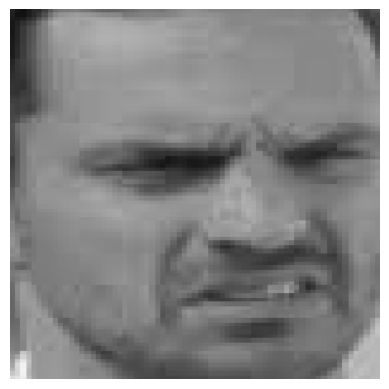

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted class index: 5
Predicted class name: happiness


In [20]:
# Example usage of predict_image
image_path = os.path.join(path, 'disgust', '2Q___face.png')  # Replace with an actual image path
# show image
import matplotlib.pyplot as plt
image = tf.keras.utils.load_img(image_path, target_size=(224, 224))
plt.imshow(image)
plt.axis('off')
plt.show()
predicted_class = predict_image(loaded_model, image_path)
print("Predicted class index:", predicted_class)
print("Predicted class name:", class_names[predicted_class])

In [22]:
results

[1.965486764907837, 0.2628262937068939]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

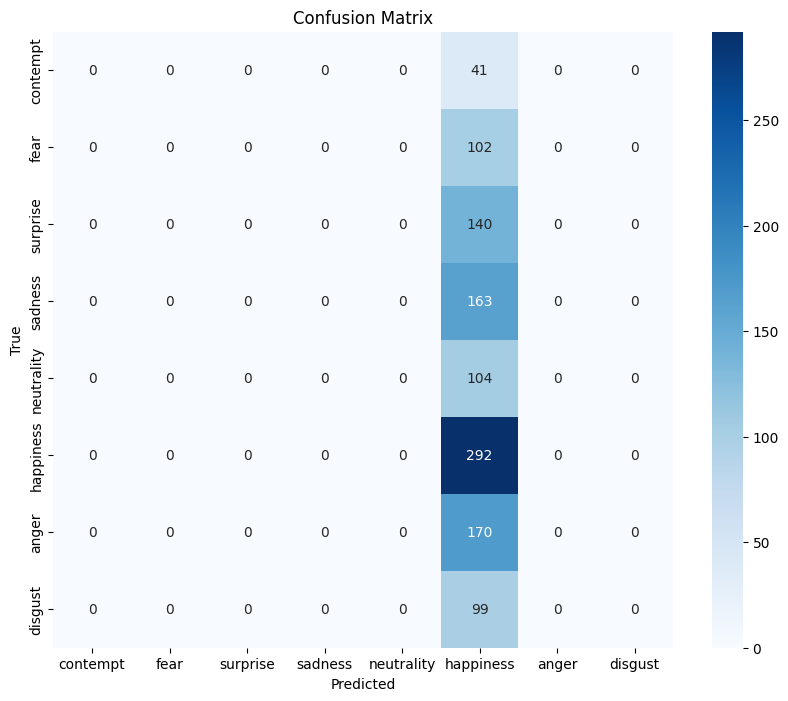

In [28]:
def confusion_matrix_plot(model, validation_dataset, class_names):
    """Plot confusion matrix for model predictions on validation dataset"""
    y_true = []
    y_pred = []

    for images, labels in validation_dataset:
        predictions = model.predict(images)
        y_true.extend(np.argmax(labels.numpy(), axis=1))
        y_pred.extend(np.argmax(predictions, axis=1))

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
# Plot confusion matrix
confusion_matrix_plot(loaded_model, validation_dataset, class_names)


In [24]:
# Check class distribution
import numpy as np

def check_class_distribution(dataset, class_names):
    label_counts = np.zeros(len(class_names))

    for _, labels in dataset:
        # Convert one-hot to class indices
        class_indices = np.argmax(labels.numpy(), axis=1)
        for idx in class_indices:
            label_counts[idx] += 1

    for i, (name, count) in enumerate(zip(class_names, label_counts)):
        print(f"{name}: {int(count)} images ({count/sum(label_counts)*100:.1f}%)")

    return label_counts

# Check your dataset
check_class_distribution(train_dataset, class_names)

contempt: 136 images (3.8%)
fear: 363 images (10.2%)
surprise: 508 images (14.3%)
sadness: 460 images (13.0%)
neutrality: 343 images (9.7%)
happiness: 891 images (25.1%)
anger: 582 images (16.4%)
disgust: 269 images (7.6%)


array([136., 363., 508., 460., 343., 891., 582., 269.])

In [25]:
# Better model architecture for emotion recognition
def create_emotion_model(num_classes=8, input_shape=(224, 224, 3)):
    model = tf.keras.Sequential([
        # Data augmentation and normalization
        tf.keras.layers.Rescaling(1./255),

        # Convolutional layers
        tf.keras.layers.Conv2D(32, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, 3, activation='relu'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),

        # Dense layers
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [26]:
model = create_emotion_model(num_classes=8, input_shape=(224, 224, 3))
# Train the improved model
model.fit(dataset, epochs=20)  # Adjust epochs as needed
# Save the improved model
model.save('improved_face_emotion_recognition_model.h5')
# Load the improved model
loaded_improved_model = tf.keras.models.load_model('improved_face_emotion_recognition_model.h5')
# Evaluate the improved model
results_improved = loaded_improved_model.evaluate(validation_dataset)
# Predict on a new image using the improved model
predicted_class_improved = predict_image(loaded_improved_model, image_path)
print("Predicted class index (improved model):", predicted_class_improved)
print("Predicted class name (improved model):", class_names[predicted_class_improved])
# Compare results
print("Original model results:", results)
print("Improved model results:", results_improved)
# Save the improved model
loaded_improved_model.save('improved_face_emotion_recognition_model.h5')


Epoch 1/20


2025-06-13 22:23:39.737047: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:23:39.739126: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:23:39.781470: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:23:39.824515: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:23:39.836361: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:23:39.837082: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13

  6/139 ━━━━━━━━━━━━━━━━━━━━ 51s 391ms/step - accuracy: 0.0913 - loss: 3.2674

2025-06-13 22:23:42.137319: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:23:42.137358: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


  7/139 ━━━━━━━━━━━━━━━━━━━━ 52s 396ms/step - accuracy: 0.0936 - loss: 3.2541

2025-06-13 22:23:42.556738: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:23:42.559703: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 11/139 ━━━━━━━━━━━━━━━━━━━━ 49s 390ms/step - accuracy: 0.1016 - loss: 3.2142

2025-06-13 22:23:44.060529: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 12/139 ━━━━━━━━━━━━━━━━━━━━ 49s 390ms/step - accuracy: 0.1029 - loss: 3.2044

2025-06-13 22:23:44.450812: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:23:44.459171: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 15/139 ━━━━━━━━━━━━━━━━━━━━ 48s 394ms/step - accuracy: 0.1054 - loss: 3.1776

2025-06-13 22:23:45.677937: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:23:45.686656: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 16/139 ━━━━━━━━━━━━━━━━━━━━ 48s 393ms/step - accuracy: 0.1060 - loss: 3.1694

2025-06-13 22:23:46.054170: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:23:46.055437: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 22/139 ━━━━━━━━━━━━━━━━━━━━ 47s 403ms/step - accuracy: 0.1105 - loss: 3.1232

2025-06-13 22:23:48.624542: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 23/139 ━━━━━━━━━━━━━━━━━━━━ 46s 403ms/step - accuracy: 0.1114 - loss: 3.1147

2025-06-13 22:23:49.059886: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 27/139 ━━━━━━━━━━━━━━━━━━━━ 45s 407ms/step - accuracy: 0.1143 - loss: 3.0869

2025-06-13 22:23:50.760859: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 36/139 ━━━━━━━━━━━━━━━━━━━━ 41s 405ms/step - accuracy: 0.1195 - loss: 3.0373

2025-06-13 22:23:54.334795: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 38/139 ━━━━━━━━━━━━━━━━━━━━ 40s 403ms/step - accuracy: 0.1205 - loss: 3.0292

2025-06-13 22:23:55.082297: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:23:55.087081: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 40/139 ━━━━━━━━━━━━━━━━━━━━ 39s 402ms/step - accuracy: 0.1213 - loss: 3.0217

2025-06-13 22:23:55.868655: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 41/139 ━━━━━━━━━━━━━━━━━━━━ 39s 404ms/step - accuracy: 0.1217 - loss: 3.0179

2025-06-13 22:23:56.334279: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 46/139 ━━━━━━━━━━━━━━━━━━━━ 37s 405ms/step - accuracy: 0.1239 - loss: 2.9992

2025-06-13 22:23:58.405372: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 47/139 ━━━━━━━━━━━━━━━━━━━━ 37s 405ms/step - accuracy: 0.1243 - loss: 2.9958

2025-06-13 22:23:58.827882: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 48/139 ━━━━━━━━━━━━━━━━━━━━ 36s 406ms/step - accuracy: 0.1248 - loss: 2.9922

2025-06-13 22:23:59.285970: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:23:59.286365: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:23:59.287219: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 52/139 ━━━━━━━━━━━━━━━━━━━━ 35s 410ms/step - accuracy: 0.1266 - loss: 2.9790

2025-06-13 22:24:01.080979: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 54/139 ━━━━━━━━━━━━━━━━━━━━ 35s 416ms/step - accuracy: 0.1275 - loss: 2.9723

2025-06-13 22:24:02.209278: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 60/139 ━━━━━━━━━━━━━━━━━━━━ 33s 419ms/step - accuracy: 0.1303 - loss: 2.9536

2025-06-13 22:24:04.911697: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 61/139 ━━━━━━━━━━━━━━━━━━━━ 32s 420ms/step - accuracy: 0.1307 - loss: 2.9507

2025-06-13 22:24:05.344886: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:24:05.352491: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 64/139 ━━━━━━━━━━━━━━━━━━━━ 31s 426ms/step - accuracy: 0.1319 - loss: 2.9426

2025-06-13 22:24:07.023112: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:24:07.099332: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 65/139 ━━━━━━━━━━━━━━━━━━━━ 32s 433ms/step - accuracy: 0.1322 - loss: 2.9400

2025-06-13 22:24:07.917370: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 67/139 ━━━━━━━━━━━━━━━━━━━━ 31s 438ms/step - accuracy: 0.1329 - loss: 2.9353

2025-06-13 22:24:09.077477: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 69/139 ━━━━━━━━━━━━━━━━━━━━ 30s 440ms/step - accuracy: 0.1335 - loss: 2.9307

2025-06-13 22:24:10.061507: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:24:10.071050: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 72/139 ━━━━━━━━━━━━━━━━━━━━ 29s 440ms/step - accuracy: 0.1345 - loss: 2.9237

2025-06-13 22:24:11.424530: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:24:11.426502: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 77/139 ━━━━━━━━━━━━━━━━━━━━ 27s 437ms/step - accuracy: 0.1360 - loss: 2.9126

2025-06-13 22:24:13.402218: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 80/139 ━━━━━━━━━━━━━━━━━━━━ 25s 435ms/step - accuracy: 0.1368 - loss: 2.9061

2025-06-13 22:24:14.572005: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 81/139 ━━━━━━━━━━━━━━━━━━━━ 25s 435ms/step - accuracy: 0.1370 - loss: 2.9040

2025-06-13 22:24:14.943283: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:24:14.951485: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 83/139 ━━━━━━━━━━━━━━━━━━━━ 24s 435ms/step - accuracy: 0.1375 - loss: 2.8999

2025-06-13 22:24:15.870098: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:24:15.870477: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:24:15.871229: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 84/139 ━━━━━━━━━━━━━━━━━━━━ 23s 435ms/step - accuracy: 0.1378 - loss: 2.8978

2025-06-13 22:24:16.247165: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 86/139 ━━━━━━━━━━━━━━━━━━━━ 23s 435ms/step - accuracy: 0.1384 - loss: 2.8938

2025-06-13 22:24:17.110616: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 88/139 ━━━━━━━━━━━━━━━━━━━━ 22s 433ms/step - accuracy: 0.1390 - loss: 2.8900

2025-06-13 22:24:17.887172: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 89/139 ━━━━━━━━━━━━━━━━━━━━ 21s 433ms/step - accuracy: 0.1392 - loss: 2.8881

2025-06-13 22:24:18.253875: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


 99/139 ━━━━━━━━━━━━━━━━━━━━ 17s 427ms/step - accuracy: 0.1417 - loss: 2.8710

2025-06-13 22:24:22.063734: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


101/139 ━━━━━━━━━━━━━━━━━━━━ 16s 427ms/step - accuracy: 0.1422 - loss: 2.8679

2025-06-13 22:24:22.833551: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:24:22.836329: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


102/139 ━━━━━━━━━━━━━━━━━━━━ 15s 426ms/step - accuracy: 0.1424 - loss: 2.8663

2025-06-13 22:24:23.192642: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:24:23.201376: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:24:23.201731: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


104/139 ━━━━━━━━━━━━━━━━━━━━ 14s 425ms/step - accuracy: 0.1428 - loss: 2.8635

2025-06-13 22:24:23.994995: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


106/139 ━━━━━━━━━━━━━━━━━━━━ 14s 425ms/step - accuracy: 0.1432 - loss: 2.8608

2025-06-13 22:24:24.753283: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:24:24.753541: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


107/139 ━━━━━━━━━━━━━━━━━━━━ 13s 424ms/step - accuracy: 0.1434 - loss: 2.8594

2025-06-13 22:24:25.168471: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


108/139 ━━━━━━━━━━━━━━━━━━━━ 13s 424ms/step - accuracy: 0.1436 - loss: 2.8581

2025-06-13 22:24:25.564494: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:24:25.564591: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:24:25.573984: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


111/139 ━━━━━━━━━━━━━━━━━━━━ 11s 424ms/step - accuracy: 0.1441 - loss: 2.8541

2025-06-13 22:24:26.791081: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:24:26.791468: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


113/139 ━━━━━━━━━━━━━━━━━━━━ 11s 423ms/step - accuracy: 0.1445 - loss: 2.8515

2025-06-13 22:24:27.605521: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:24:27.609060: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


115/139 ━━━━━━━━━━━━━━━━━━━━ 10s 423ms/step - accuracy: 0.1448 - loss: 2.8490

2025-06-13 22:24:28.380403: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


117/139 ━━━━━━━━━━━━━━━━━━━━ 9s 422ms/step - accuracy: 0.1452 - loss: 2.8465

2025-06-13 22:24:29.126252: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


118/139 ━━━━━━━━━━━━━━━━━━━━ 8s 421ms/step - accuracy: 0.1453 - loss: 2.8453

2025-06-13 22:24:29.500282: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


119/139 ━━━━━━━━━━━━━━━━━━━━ 8s 421ms/step - accuracy: 0.1455 - loss: 2.8440

2025-06-13 22:24:29.872485: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


121/139 ━━━━━━━━━━━━━━━━━━━━ 7s 421ms/step - accuracy: 0.1459 - loss: 2.8416

2025-06-13 22:24:30.655473: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:24:30.658233: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


122/139 ━━━━━━━━━━━━━━━━━━━━ 7s 420ms/step - accuracy: 0.1461 - loss: 2.8403

2025-06-13 22:24:31.040376: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG
2025-06-13 22:24:31.040407: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


125/139 ━━━━━━━━━━━━━━━━━━━━ 5s 419ms/step - accuracy: 0.1466 - loss: 2.8367

2025-06-13 22:24:32.164414: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


126/139 ━━━━━━━━━━━━━━━━━━━━ 5s 419ms/step - accuracy: 0.1467 - loss: 2.8356

2025-06-13 22:24:32.557743: W tensorflow/core/lib/png/png_io.cc:92] PNG warning: iCCP: profile 'ICC Profile': 'RGB ': RGB color space not permitted on grayscale PNG


139/139 ━━━━━━━━━━━━━━━━━━━━ 59s 416ms/step - accuracy: 0.1489 - loss: 2.8198
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 54s 389ms/step - accuracy: 0.1961 - loss: 2.4472
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 52s 376ms/step - accuracy: 0.2091 - loss: 2.3297
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 53s 381ms/step - accuracy: 0.2110 - loss: 2.2452
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 53s 383ms/step - accuracy: 0.2153 - loss: 2.1660
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 53s 383ms/step - accuracy: 0.2211 - loss: 2.1432
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 55s 397ms/step - accuracy: 0.2308 - loss: 2.0588
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 53s 383ms/step - accuracy: 0.2383 - loss: 2.0223
Epoch 9/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 54s 386ms/step - accuracy: 0.2553 - loss: 1.9957
Epoch 10/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 54s 387ms/step - accuracy: 0.2481 - loss: 1.9699
Epoch 11/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 55s 398ms/step - accuracy: 0.2657 - loss: 1.9384
Epoch 12/20
139/139 ━━━━━━━━━━

35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 91ms/step - accuracy: 0.0987 - loss: 9.1211
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


Predicted class index (improved model): 7
Predicted class name (improved model): disgust
Original model results: [1.965486764907837, 0.2628262937068939]
Improved model results: [9.295952796936035, 0.0891089141368866]


In [27]:
# Load the improved model
loaded_improved_model = tf.keras.models.load_model('improved_face_emotion_recognition_model.h5')
# Evaluate the improved model
results_improved = loaded_improved_model.evaluate(validation_dataset)
# Predict on a new image using the improved model
predicted_class_improved = predict_image(loaded_improved_model, image_path)
print("Predicted class index (improved model):", predicted_class_improved)
print("Predicted class name (improved model):", class_names[predicted_class_improved])
# Compare results
print("Original model results:", results)
print("Improved model results:", results_improved)


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 96ms/step - accuracy: 0.0987 - loss: 9.1211
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted class index (improved model): 7
Predicted class name (improved model): disgust
Original model results: [1.965486764907837, 0.2628262937068939]
Improved model results: [9.295952796936035, 0.0891089141368866]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

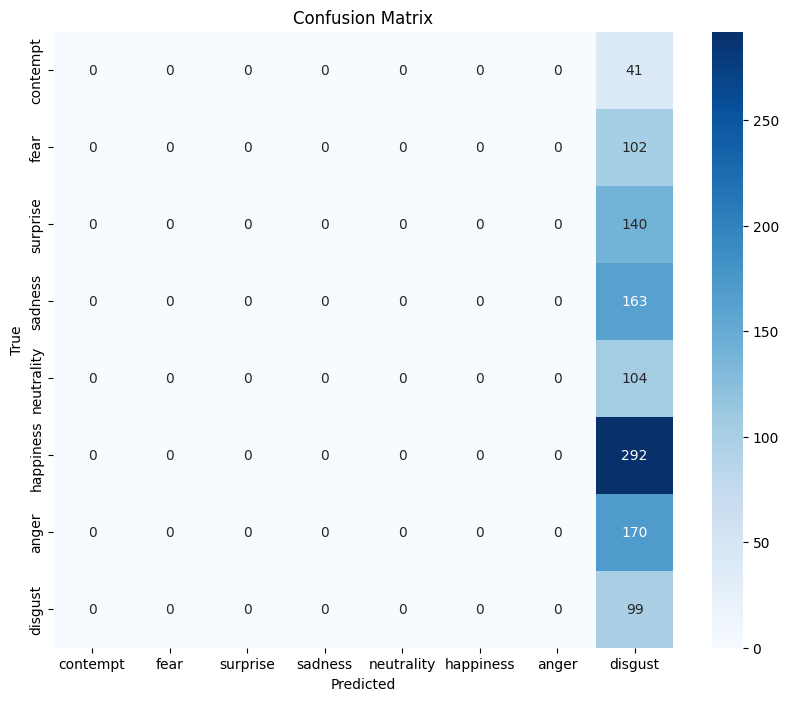

In [29]:
# Plot confusion matrix
confusion_matrix_plot(loaded_improved_model, validation_dataset, class_names)

In [34]:
# improve model further for better accuracy
def create_advanced_emotion_model(num_classes=8, input_shape=(224, 224, 3)):
    model = tf.keras.Sequential([
        # Data augmentation and normalization
        tf.keras.layers.Rescaling(1./255),

        # Convolutional layers with increased depth
        tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),

        # Additional convolutional block
        tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),

        # Additional convolutional block
        tf.keras.layers.Conv2D(512, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),

        # Additional convolutional block
        tf.keras.layers.Conv2D(1024, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),

        # Dense layers
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(2048, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Lower learning rate
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create and train the advanced model
advanced_model = create_advanced_emotion_model(num_classes=8, input_shape=(224, 224, 3))
# Train the advanced model
advanced_model.fit(dataset, epochs=1)  # Adjust epochs as needed
# Save the advanced model
advanced_model.save('advanced_face_emotion_recognition_model.h5')


139/139 ━━━━━━━━━━━━━━━━━━━━ 112s 787ms/step - accuracy: 0.1652 - loss: 3.3328


35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 198ms/step - accuracy: 0.2586 - loss: 3.2335
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Predicted class index (advanced model): 5
Predicted class name (advanced model): happiness
Original model results: [1.965486764907837, 0.2628262937068939]
Improved model results: [9.295952796936035, 0.0891089141368866]
Advanced model results: [3.209885358810425, 0.2628262937068939]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━

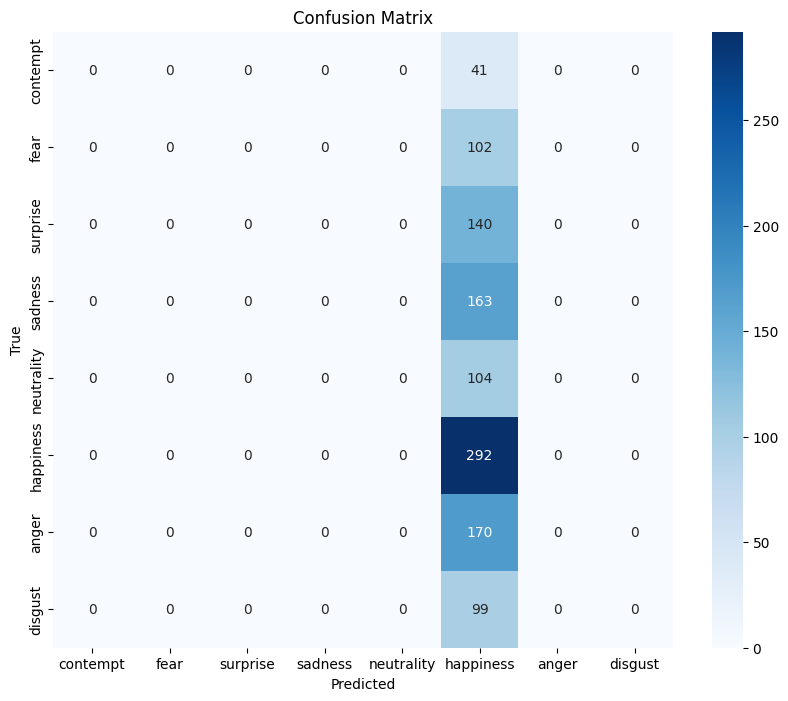

In [35]:
# Load the advanced model
loaded_advanced_model = tf.keras.models.load_model('advanced_face_emotion_recognition_model.h5')
# Evaluate the advanced model
results_advanced = loaded_advanced_model.evaluate(validation_dataset)
# Predict on a new image using the advanced model
predicted_class_advanced = predict_image(loaded_advanced_model, image_path)
print("Predicted class index (advanced model):", predicted_class_advanced)
print("Predicted class name (advanced model):", class_names[predicted_class_advanced])
# Compare results
print("Original model results:", results)
print("Improved model results:", results_improved)
print("Advanced model results:", results_advanced)
# Plot confusion matrix for advanced model
confusion_matrix_plot(loaded_advanced_model, validation_dataset, class_names)


In [37]:
# Use class weights
from sklearn.utils.class_weight import compute_class_weight

def compute_class_weights(dataset, class_names):
    labels = []
    for _, batch_labels in dataset:
        batch_indices = np.argmax(batch_labels.numpy(), axis=1)
        labels.extend(batch_indices)

    class_weights = compute_class_weight(
        'balanced',
        classes=np.unique(labels),
        y=labels
    )

    return dict(enumerate(class_weights))

class_weights = compute_class_weights(dataset, class_names)
print("Class weights:", class_weights)

# Use in model training
model.fit(dataset,class_weight=class_weights, epochs=1)
# Save the improved model
model.save('improved_face_emotion_recognition_model_01.h5')



Class weights: {0: 3.3285928143712575, 1: 1.1877670940170941, 2: 0.8753937007874015, 3: 0.9534734133790738, 4: 1.3235119047619048, 5: 0.4989901256732496, 6: 0.7720486111111111, 7: 1.6349264705882354}
139/139 ━━━━━━━━━━━━━━━━━━━━ 53s 378ms/step - accuracy: 0.2918 - loss: 1.9492


35/35 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.1199 - loss: 13.5812
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted class index (improved model with weights): 2
Predicted class name (improved model with weights): surprise
Original model results: [1.965486764907837, 0.2628262937068939]
Improved model results: [9.295952796936035, 0.0891089141368866]
Improved model with weights results: [13.697208404541016, 0.12601260840892792]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━

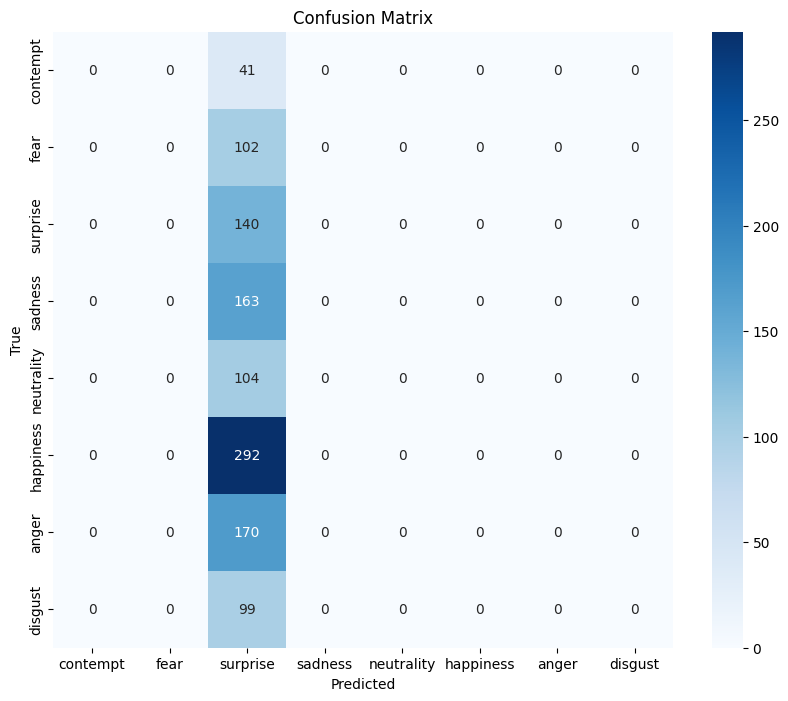

In [38]:
# Load the improved model with class weights
loaded_improved_model_with_weights = tf.keras.models.load_model('improved_face_emotion_recognition_model_01.h5')
# Evaluate the improved model with class weights
results_improved_with_weights = loaded_improved_model_with_weights.evaluate(validation_dataset)
# Predict on a new image using the improved model with class weights
predicted_class_improved_with_weights = predict_image(loaded_improved_model_with_weights, image_path)
print("Predicted class index (improved model with weights):", predicted_class_improved_with_weights)
print("Predicted class name (improved model with weights):", class_names[predicted_class_improved_with_weights])
# Compare results with class weights
print("Original model results:", results)
print("Improved model results:", results_improved)
print("Improved model with weights results:", results_improved_with_weights)
# Plot confusion matrix for improved model with class weights
confusion_matrix_plot(loaded_improved_model_with_weights, validation_dataset, class_names)